## 图像卷积

这部分内容备用


不演示

In [1]:
#! conda install opencv-python

In [2]:
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['font.sans-serif'] = ['FangSong']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
#im = cv2.imread(r'..\res\flower.jpg', cv2.IMREAD_GRAYSCALE)
#im = cv2.imread(r'flower.jpg', cv2.IMREAD_GRAYSCALE)
im = cv2.imread(r'door.jfif', cv2.IMREAD_GRAYSCALE)
w3 = np.ones((3,3)) # 生成3×3的权重数组
w3 /= np.sum(w3) # 累计权重为1
w9 = np.ones((9,9)) # 生成9×9的权重数组
w9 /= np.sum(w9) # 累计权重为1

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


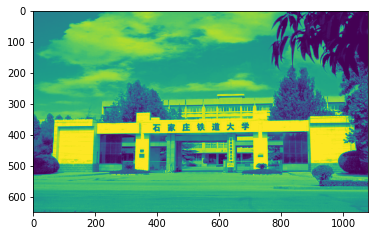

In [5]:
plt.imshow(im)
plt.show()

In [6]:
im_w3 = ndimage.convolve(im, w3) # 使用3×3的权重数组对图像做卷积
im_w9 = ndimage.convolve(im, w9) # 使用9×9的权重数组对图像做卷积

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhao/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21407 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhao/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhao/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhao/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhao/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhao/mi

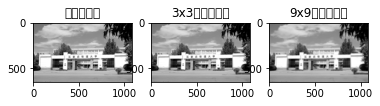

In [7]:
plt.subplot(131)
plt.title('原始灰度图')
plt.imshow(im, cmap=plt.cm.gray)
plt.subplot(132)
plt.title('3x3卷积灰度图')
plt.imshow(im_w3, cmap=plt.cm.gray)
plt.subplot(133)
plt.title('9x9卷积灰度图')
plt.imshow(im_w9, cmap=plt.cm.gray)
plt.show()

## 边缘检测

scipy.image提供了一阶的prewitt算法和sobel算法，用于计算图像的边缘。由于图像是二维数组存储的，使用一阶算法时，需要先分别从两个轴的方向求导后，再合并结果。

In [8]:
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['FangSong']
plt.rcParams['axes.unicode_minus'] = False

# im = cv2.imread(r'..\res\cup.jpg', cv2.IMREAD_GRAYSCALE)
im = cv2.imread(r'cup.jpg', cv2.IMREAD_GRAYSCALE)
pwt0 = ndimage.prewitt(im, axis=0) # 对0轴做prewitt边缘检测
pwt1 = ndimage.prewitt(im, axis=1) # 对1轴做prewitt边缘检测
im_pwt = np.zeros(im.shape, dtype=np.uint8)
im_pwt[(pwt0>128)|(pwt1>128)] = 255 # 合并prewitt边缘检测结果
sob0 = ndimage.sobel(im, axis=0) # 对0轴做sobel边缘检测
sob1 = ndimage.sobel(im, axis=1) # 对1轴做sobel边缘检测
im_sob = np.zeros(im.shape, dtype=np.uint8)
im_sob[(sob0>128)|(sob1>128)] = 255 # 合并sobel边缘检测结果
im_lap = ndimage.laplace(im) # 拉普拉斯边缘检测

plt.subplot(221)
plt.title('原始灰度图')
plt.imshow(im, cmap=plt.cm.gray)
plt.subplot(222)
plt.title('prewitt边缘检测')
plt.imshow(im_pwt, cmap=plt.cm.gray)
plt.subplot(223)
plt.title('sobel边缘检测')
plt.imshow(im_sob, cmap=plt.cm.gray)
plt.subplot(224)
plt.title('laplace边缘检测')
plt.imshow(im_lap, cmap=plt.cm.gray)
plt.show()


AxisError: axis 0 is out of bounds for array of dimension 0